# matplotlib les bases

matplotlib en mode fonction
matplotlib.pyplot as plt

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
x = np.linspace(0, 2, 10)
y = x**2
# Utiliser des noms différents (x_val, y_val) pour ne pas écraser x et y
for x_val, y_val in zip(x, y):
    print(f"({x_val:,.3f}, {y_val:,.3f})")


(0.000, 0.000)
(0.222, 0.049)
(0.444, 0.198)
(0.667, 0.444)
(0.889, 0.790)
(1.111, 1.235)
(1.333, 1.778)
(1.556, 2.420)
(1.778, 3.160)
(2.000, 4.000)


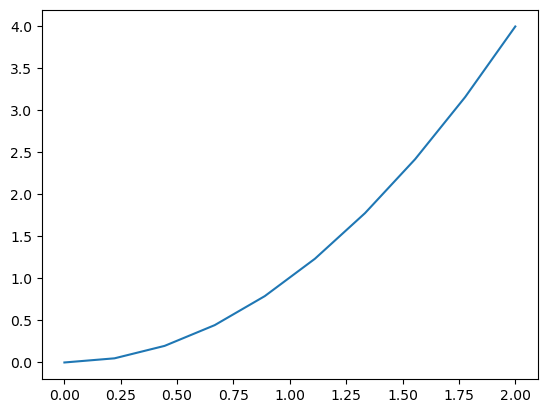

In [69]:
plt.plot(x, y)
plt.show()

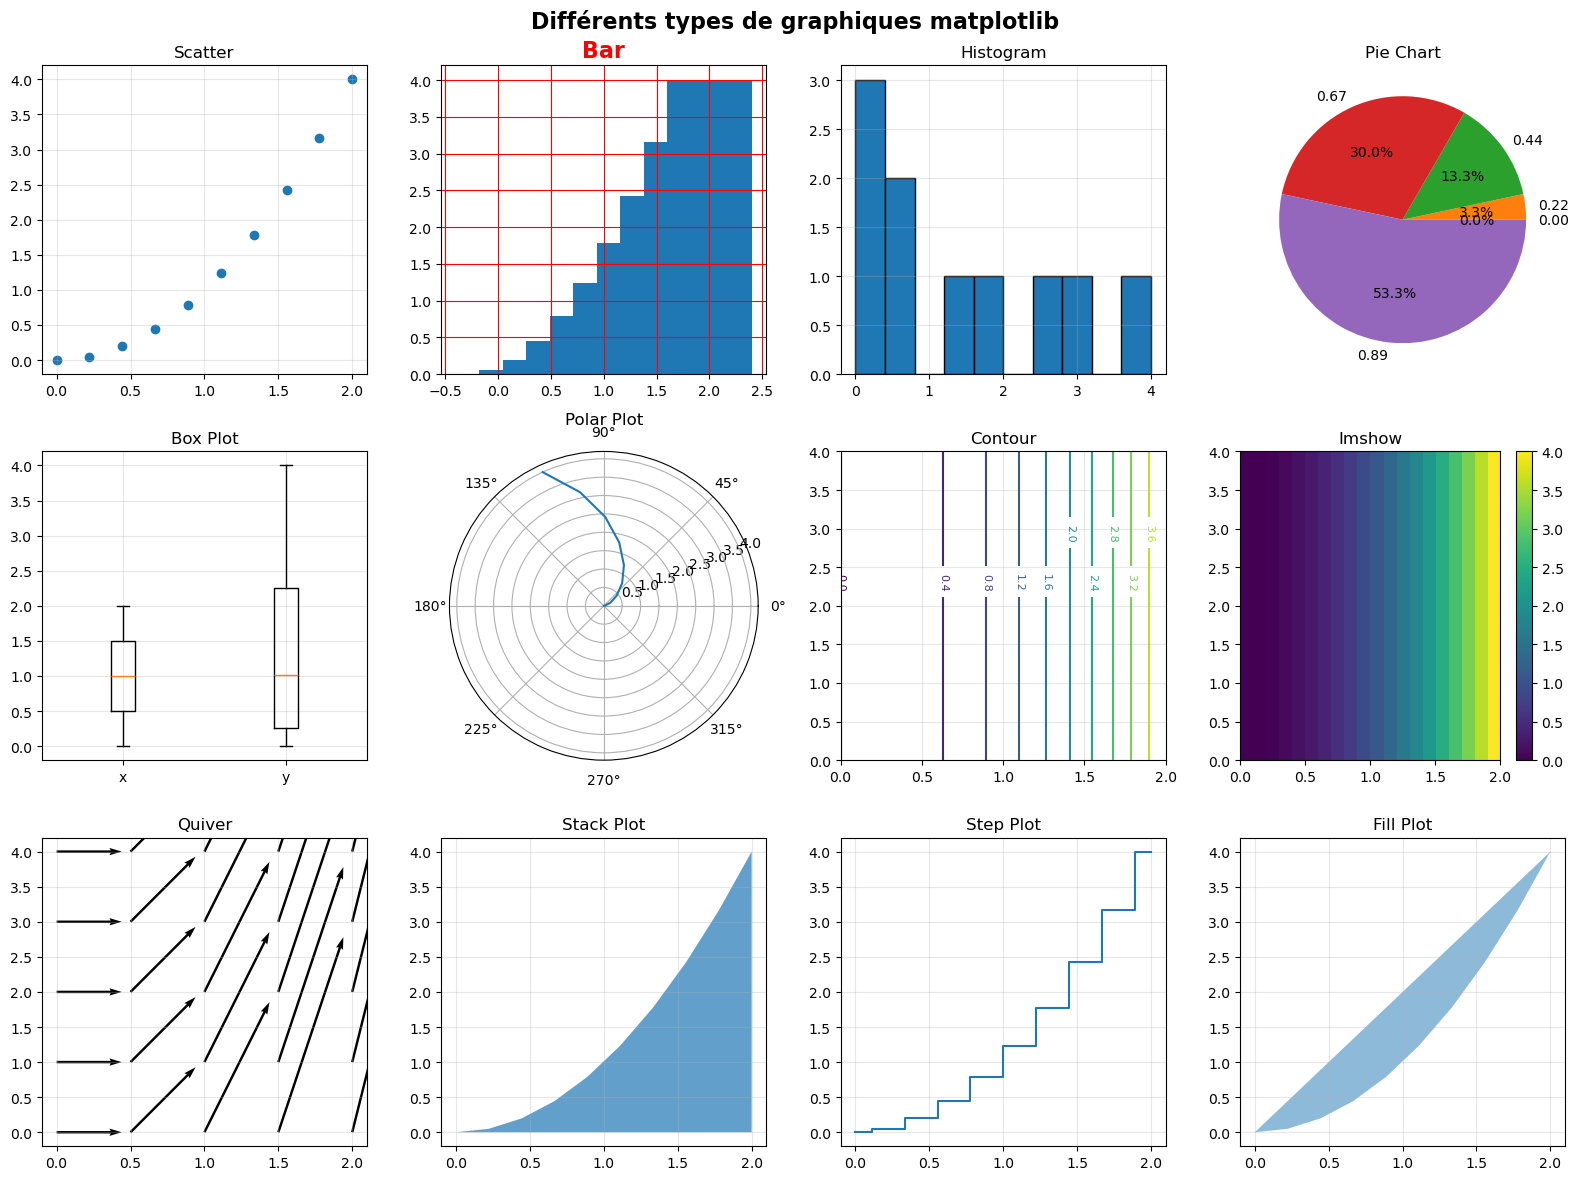

In [70]:
# Créer une figure avec une grille de 4 colonnes x 3 lignes (12 subplots)
# size d un subplot 16 par 12 
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Différents types de graphiques matplotlib', fontsize=16, fontweight='bold')
# Aplatir le tableau d'axes pour faciliter l'itération
axes = axes.flatten()

# 1. Scatter plot
axes[0].scatter(x, y)
axes[0].set_title('Scatter')
axes[0].grid(True, alpha=0.3)

# 2. Bar plot
axes[1].bar(x, y)
axes[1].set_title('Bar', color='red', fontsize=16, fontweight='bold')
axes[1].grid(True, color='red')

# 3. Histogram (utilise y comme données)
axes[2].hist(y, bins=10, edgecolor='black')
axes[2].set_title('Histogram')
axes[2].grid(True, alpha=0.3)

# 4. Pie chart (utilise les premières valeurs de y)
axes[3].pie(y[:5], labels=[f'{val:.2f}' for val in x[:5]], autopct='%1.1f%%')
axes[3].set_title('Pie Chart')

# 5. Box plot
axes[4].boxplot([x, y], tick_labels=['x', 'y'])
axes[4].set_title('Box Plot')
axes[4].grid(True, alpha=0.3)

# 6. Polar plot (remplacer l'axe normal par un axe polar)
fig.delaxes(axes[5])  # Supprimer l'axe normal
ax_polar = fig.add_subplot(3, 4, 6, projection='polar')
ax_polar.plot(x, y)
ax_polar.set_title('Polar Plot', pad=20)

# 7. Contour plot (nécessite une grille 2D)
X_grid = np.linspace(0, 2, 20)
Y_grid = np.linspace(0, 4, 20)
X_contour, Y_contour = np.meshgrid(X_grid, Y_grid)
Z = X_contour**2  # Fonction y = x^2
contour = axes[6].contour(X_contour, Y_contour, Z, levels=10)
axes[6].clabel(contour, inline=True, fontsize=8)
axes[6].set_title('Contour')
axes[6].grid(True, alpha=0.3)

# 8. Imshow (affiche Z comme image - utilise le même Z que contour)
im = axes[7].imshow(Z, extent=[0, 2, 0, 4], aspect='auto', origin='lower')
axes[7].set_title('Imshow')
plt.colorbar(im, ax=axes[7])

# 9. Quiver (champ de vecteurs - nécessite des composantes u et v)
X_q, Y_q = np.meshgrid(np.linspace(0, 2, 5), np.linspace(0, 4, 5))
U = np.ones_like(X_q)  # Composante x
V = 2 * X_q  # Composante y (dérivée de x^2 = 2x)
axes[8].quiver(X_q, Y_q, U, V, scale=5)
axes[8].set_title('Quiver')
axes[8].grid(True, alpha=0.3)

# 10. Stack plot (utilise fill_between pour simuler un stackplot)
axes[9].fill_between(x, 0, y, alpha=0.7)
axes[9].set_title('Stack Plot')
axes[9].grid(True, alpha=0.3)

# 11. Step plot
axes[10].step(x, y, where='mid')
axes[10].set_title('Step Plot')
axes[10].grid(True, alpha=0.3)

# 12. Fill plot
axes[11].fill(x, y, alpha=0.5)
axes[11].set_title('Fill Plot')
axes[11].grid(True, alpha=0.3)

# Ajuster l'espacement entre les subplots
plt.tight_layout()
plt.show()

### Customisation de plt.plot()
```python
plt.plot(
    x,              # valeurs des x (array-like)
    y,              # valeurs des y (array-like)
    label='nom',    # nom de la courbe (pour la légende)
    lw=2,           # linewidth : épaisseur du trait (float)
    ls='-',         # linestyle : style de ligne ('-', '--', '-.', ':', '', ' ', 'None')
    color='blue',   # couleur de la ligne (nom, hex, RGB, etc.)
    c='blue',       # alias de color
    marker='o',     # style de marqueur ('o', 's', '^', 'v', 'x', '+', '*', '.', etc.)
    markersize=8,   # taille des marqueurs (float)
    ms=8,           # alias de markersize
    markerfacecolor='red',  # couleur de remplissage des marqueurs
    markeredgecolor='black', # couleur du contour des marqueurs
    markeredgewidth=1,      # épaisseur du contour des marqueurs
    alpha=0.7,      # transparence (0.0 à 1.0)
    linestyle='-',  # alias de ls
    linewidth=2,    # alias de lw
    visible=True,   # afficher ou non la ligne
    zorder=2,       # ordre d'affichage (plus élevé = au-dessus)
    antialiased=True, # lissage de la ligne
    dash_capstyle='round',  # style des extrémités ('butt', 'round', 'projecting')
    solid_capstyle='round', # style des extrémités pour ligne solide
    dash_joinstyle='round', # style des jointures ('miter', 'round', 'bevel')
    solid_joinstyle='round' # style des jointures pour ligne solide
)
```

**Exemples de styles de ligne (ls/linestyle) :**
- `'-'` ou `'solid'` : ligne continue
- `'--'` ou `'dashed'` : ligne pointillée
- `'-.'` ou `'dashdot'` : ligne pointillée-trait
- `':'` ou `'dotted'` : ligne pointillée fine
- `''` ou `'None'` : pas de ligne (seulement marqueurs)

**Exemples de marqueurs (marker) :**
- `'o'` : cercle
- `'s'` : carré
- `'^'` : triangle vers le haut
- `'v'` : triangle vers le bas
- `'x'` : croix
- `'+'` : plus
- `'*'` : étoile
- `'.'` : point
- `'D'` : losange
- `'p'` : pentagone

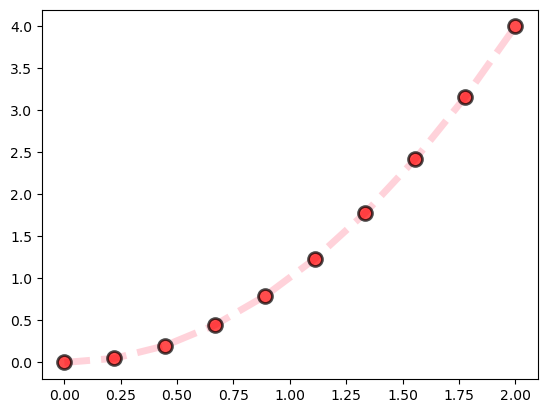

In [71]:
plt.plot(x, y, c="pink", lw=5, ls="--", marker="o", markersize=10, markerfacecolor="red", markeredgecolor="black", markeredgewidth=2, alpha=0.7)
plt.show()

### creation d une figure

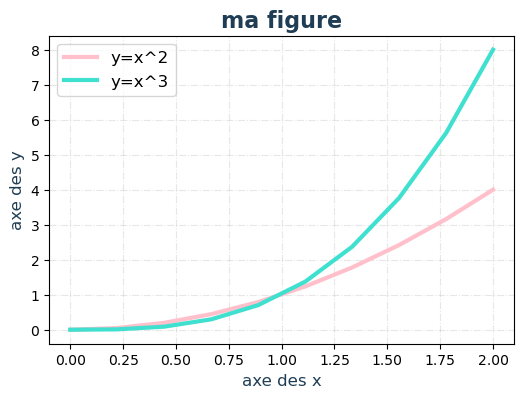

In [72]:
plt.figure(figsize=(6, 4)) # figsize dimension en pouce
plt.plot(x, y, c="pink", lw=3, label="y=x^2")
plt.plot(x, x**3, c="turquoise", lw=3, label="y=x^3")
plt.title("ma figure", fontsize=16, fontweight="bold", color='#1f3e55')
plt.xlabel("axe des x", fontsize=12, color='#1f3e55')
plt.ylabel("axe des y", fontsize=12, color='#1f3e55')
plt.grid(True, alpha=0.3, linestyle="-.")
plt.legend(loc="upper left", fontsize=12)
plt.savefig("ma_figure.png", dpi=300, bbox_inches='tight') # sauvegarde de la figure
plt.show() # Afficher après la sauvegarde

### subplot

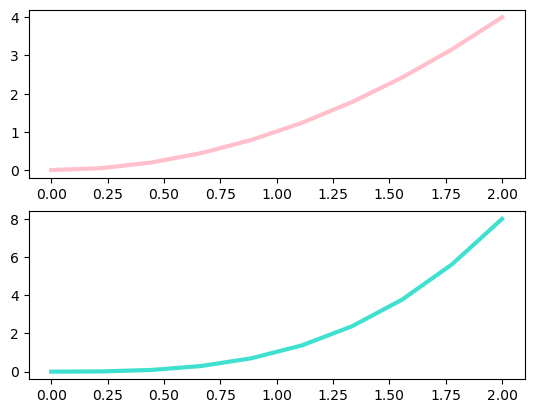

In [73]:
plt.subplot(2, 1, 1) # 2 lignes, 1 colonne, 1er subplot
plt.plot(x, y, c="pink", lw=3, label="y=x^2")
plt.subplot(2, 1, 2) # 2 lignes, 1 colonne, 2eme subplot
plt.plot(x, x**3, c="turquoise", lw=3, label="y=x^3")
plt.show()
### subplot


### Cycle de vie d'une figure matplotlib
Le cycle de vie d'une figure matplotlib suit un ordre logique en 4 étapes principales :

#### 📋 Structure générale
``` python
# ÉTAPE 1 : CRÉATION DE LA FIGURE
plt.figure(figsize=(10, 6))  # Créer une nouvelle figure (optionnel : taille en pouces)

# ÉTAPE 2 : CRÉATION DES SUBPLOTS (si plusieurs graphiques)
Option A : Créer un seul subplot (par défaut)
(pas besoin d'appeler subplot si un seul graphique)
Option B : Créer plusieurs subplots
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, position 1 (en haut)
# OU
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # Créer figure + axes en une fois

# ÉTAPE 3 : AJOUT DES GRAPHIQUES ET CUSTOMISATION
# Graphique 1
plt.plot(x, y, label='Courbe 1', color='blue', linewidth=2)
plt.title('Titre du graphique 1')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.grid(True, alpha=0.3)
plt.legend()
# Graphique 2 (si plusieurs subplots)
plt.subplot(2, 1, 2)  # Position 2 (en bas)
# OU
axes[1].plot(x, y**2, label='Courbe 2', color='red', linewidth=2)
axes[1].set_title('Titre du graphique 2')
axes[1].set_xlabel('Axe X')
axes[1].set_ylabel('Axe Y')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Ajuster l'espacement (si plusieurs subplots)
plt.tight_layout()  # Évite que les éléments se chevauchent

#ÉTAPE 4 : SAUVEGARDE ET AFFICHAGE
# IMPORTANT : Sauvegarder AVANT plt.show()
plt.savefig('ma_figure.png', dpi=300, bbox_inches='tight')
plt.show()  # Afficher la figure (ferme la figure après affichage)
```
#### 🔄 Ordre des opérations (à respecter)

1. **Créer** → `plt.figure()` ou `plt.subplots()`
2. **Configurer** → `plt.subplot()` (si plusieurs graphiques)
3. **Dessiner** → `plt.plot()`, `plt.scatter()`, etc.
4. **Personnaliser** → `plt.title()`, `plt.xlabel()`, `plt.grid()`, etc.
5. **Ajuster** → `plt.tight_layout()` (si plusieurs subplots)
6. **Sauvegarder** → `plt.savefig()` (AVANT show())
7. **Afficher** → `plt.show()` (en dernier)

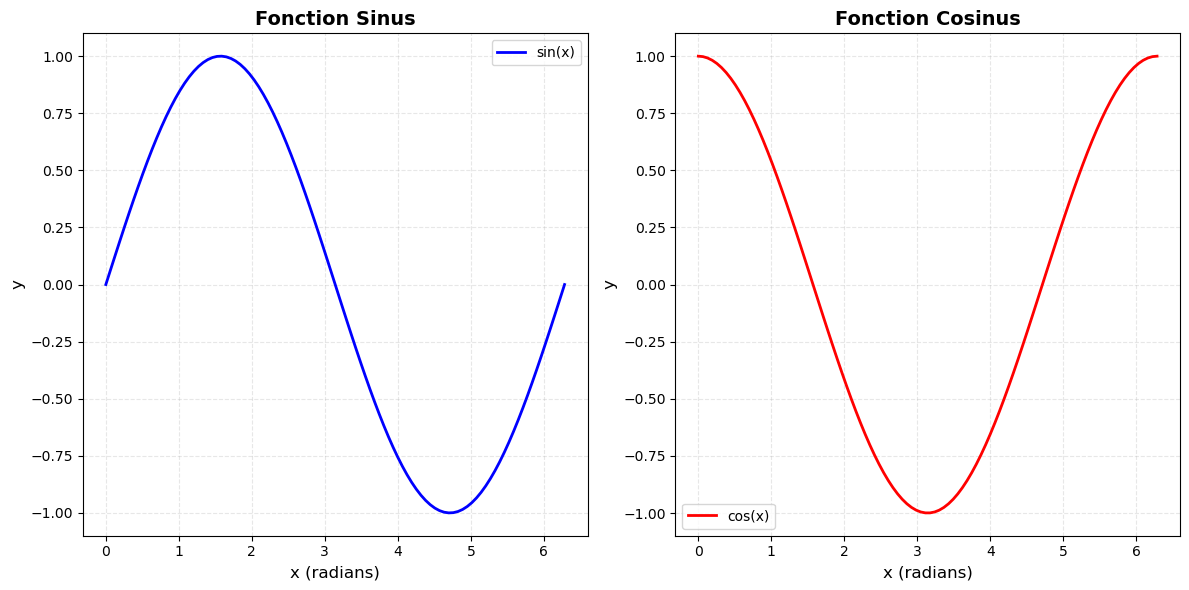

In [75]:
# ============================================
# EXEMPLE COMPLET : Cycle de vie d'une figure matplotlib
# ============================================

# Données d'exemple
vx = np.linspace(0, 2*np.pi, 100)
vy1 = np.sin(vx)
vy2 = np.cos(vx)

# ÉTAPE 1 : CRÉATION DE LA FIGURE
fig = plt.figure(figsize=(12, 6))  # Créer une figure de 12x6 pouces

# ÉTAPE 2 : CRÉATION DES SUBPLOTS
# Créer 2 subplots côte à côte (1 ligne, 2 colonnes)
ax1 = plt.subplot(1, 2, 1)  # Subplot 1 (gauche)
ax2 = plt.subplot(1, 2, 2)  # Subplot 2 (droite)

# ÉTAPE 3 : AJOUT DES GRAPHIQUES ET CUSTOMISATION
# Graphique 1 : Sinus
ax1.plot(vx, vy1, label='sin(x)', color='blue', linewidth=2)
ax1.set_title('Fonction Sinus', fontsize=14, fontweight='bold')
ax1.set_xlabel('x (radians)', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=10)
# Graphique 2 : Cosinus
ax2.plot(vx, vy2, label='cos(x)', color='red', linewidth=2)
ax2.set_title('Fonction Cosinus', fontsize=14, fontweight='bold')
ax2.set_xlabel('x (radians)', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=10)

# ÉTAPE 4 : AJUSTEMENT ET FINALISATION
plt.tight_layout()  # Ajuster l'espacement entre les subplots

# ÉTAPE 5 : SAUVEGARDE ET AFFICHAGE
# IMPORTANT : Sauvegarder AVANT plt.show()
plt.savefig('exemple_cycle_vie.png', dpi=300, bbox_inches='tight')
plt.show()  # Afficher la figure (en dernier)

# Methode orientee objet OOP

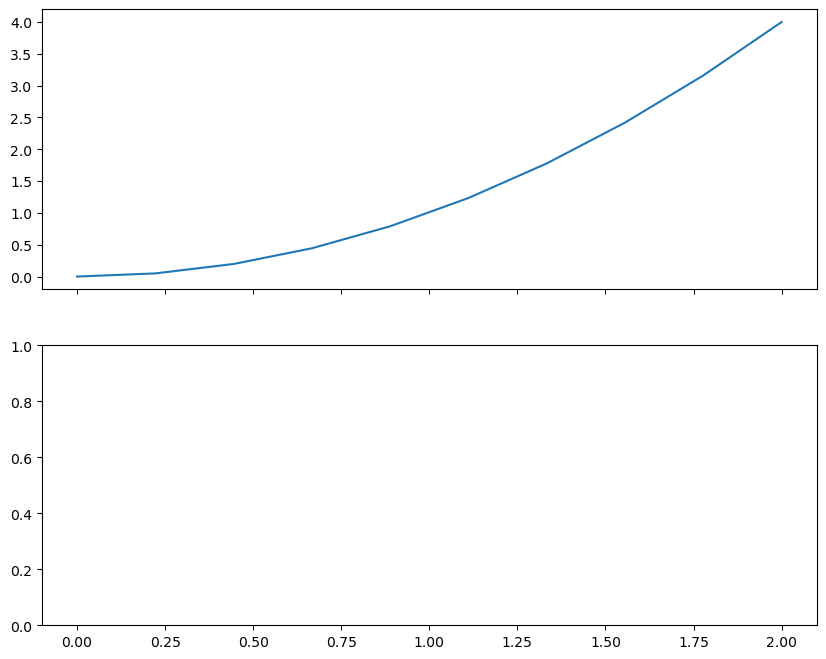

In [78]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8)) # subplots avec un s contrairement a subplot !!!
ax[0].plot(x, y)
ax[1].plot(x, x**3)
plt.show()

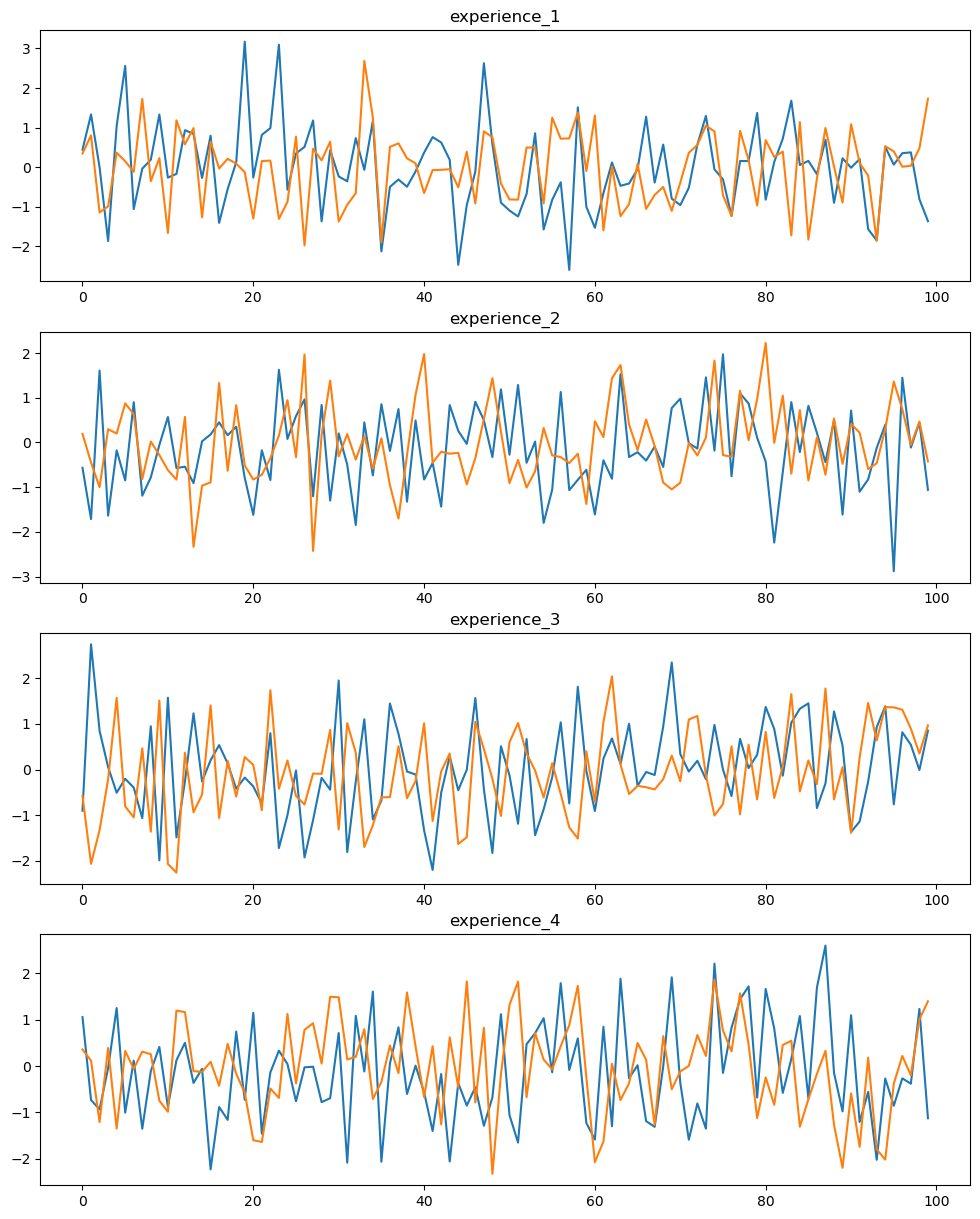

In [82]:
# Exercice

# 1 - Créer un dataset avec 4 experiences
my_dataset = {f"experience_{i}": np.random.randn(100, 2) for i in range(1, 5)}

# 2 - Créer une fonction pour afficher les données
def plot_dataset(dataset):
    n = len(dataset)
    plt.figure(figsize=(12, 15))
    for k, i in zip(dataset.keys(), range(1, n+1)):
        plt.subplot(n, 1, i)
        plt.plot(dataset[k])
        plt.title(k)
    plt.show()

# 3 - Afficher les données
plot_dataset(my_dataset)